
Stock Price Management System
1. Insert Stock Price
2. Delete Stock Price
3. Search Stock Price
4. Update Stock Price
5. Display Stock Prices (AVL Tree & Graph)
6. Predict Future Stock Prices
7. Change Confidence Level
8. Exit


Enter your choice:  1
Enter stock price to insert:  55


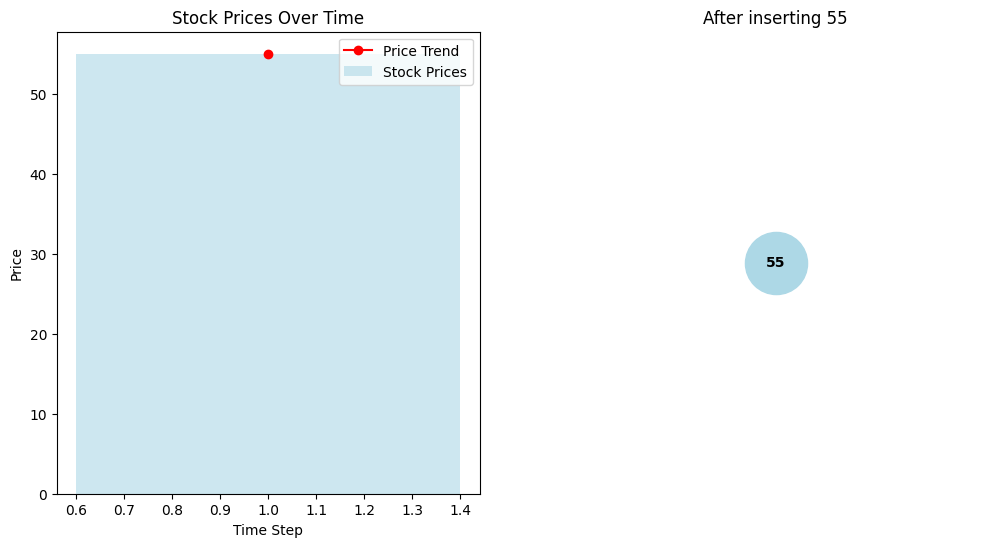

Enter stock price to insert:  44


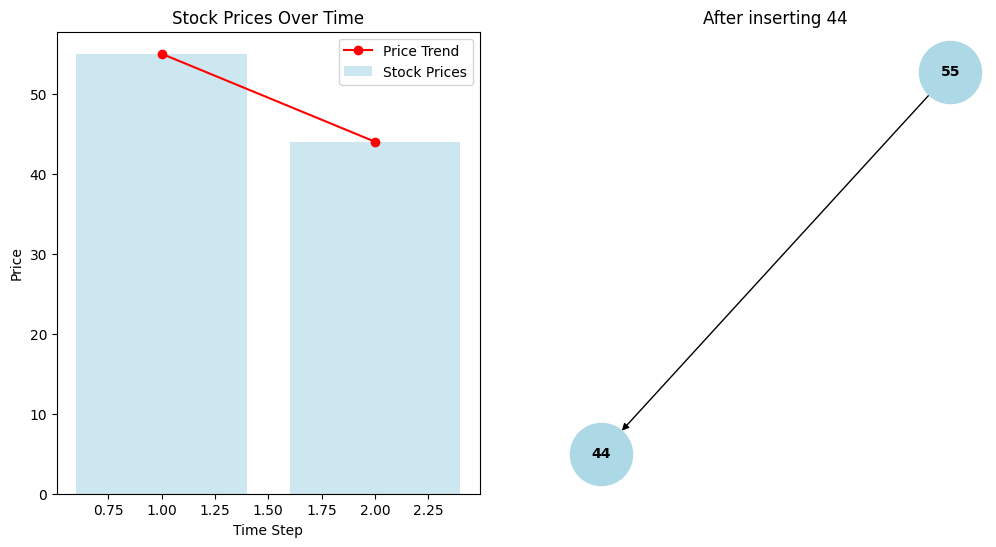

Enter stock price to insert:  66


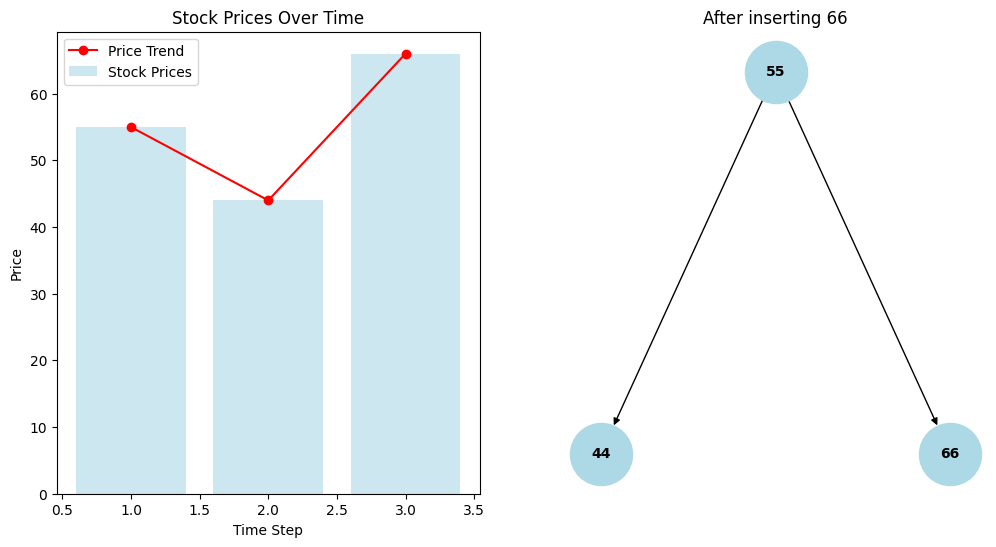

Enter stock price to insert:  49


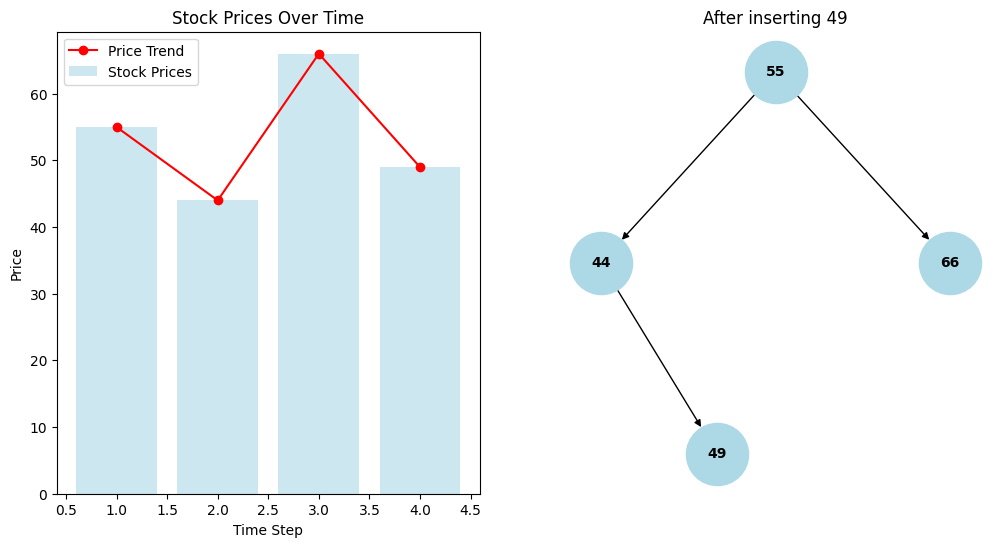

Enter stock price to insert:  73


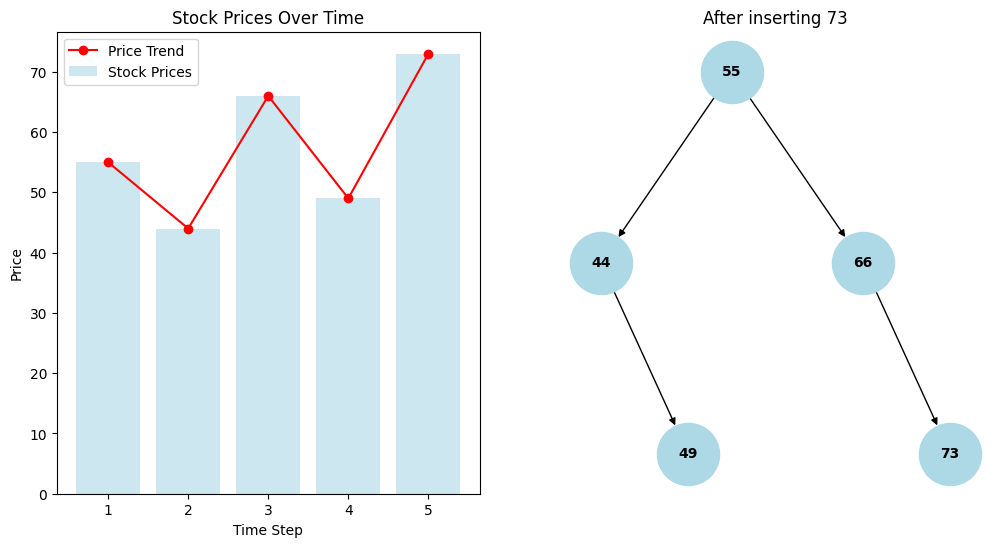

Enter stock price to insert:  75


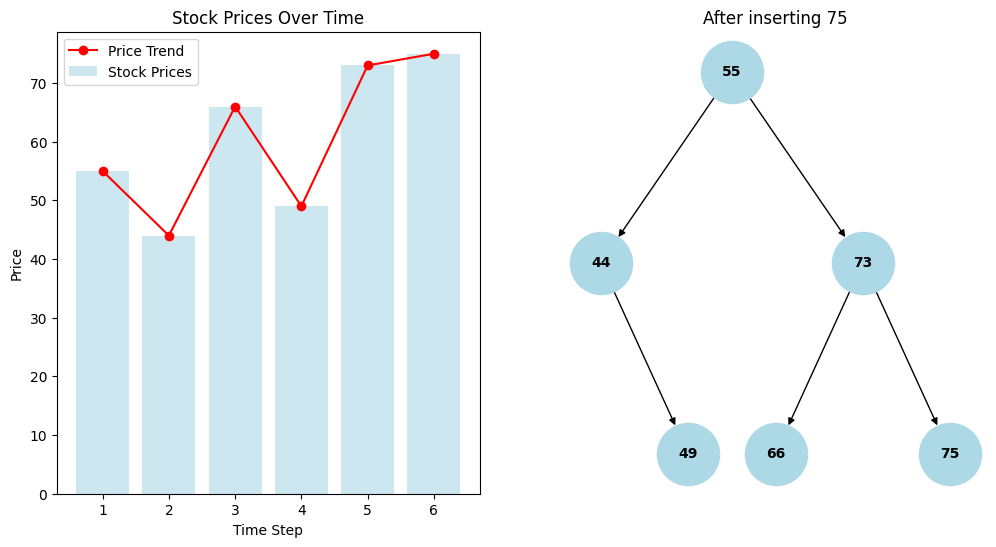

Enter stock price to insert:  46


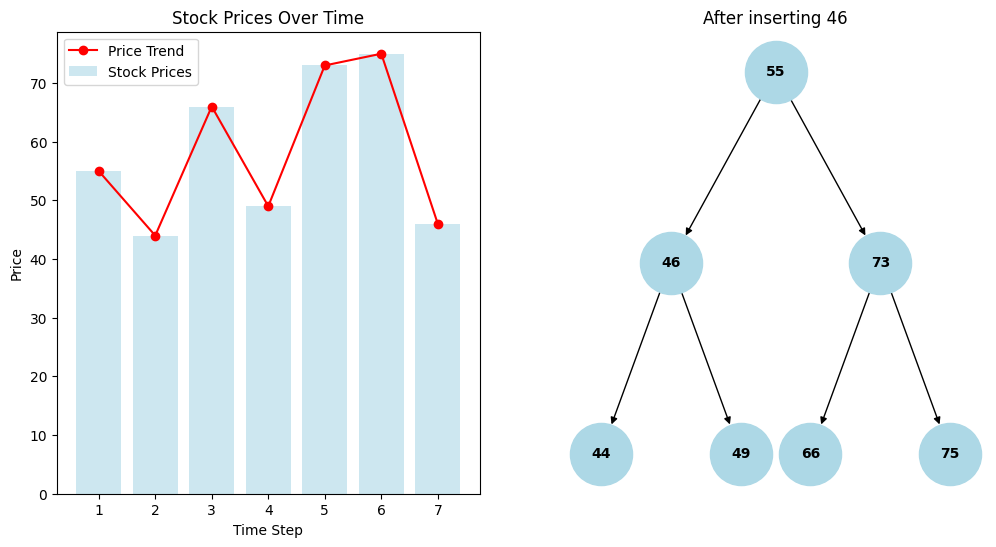

Enter stock price to insert:  42


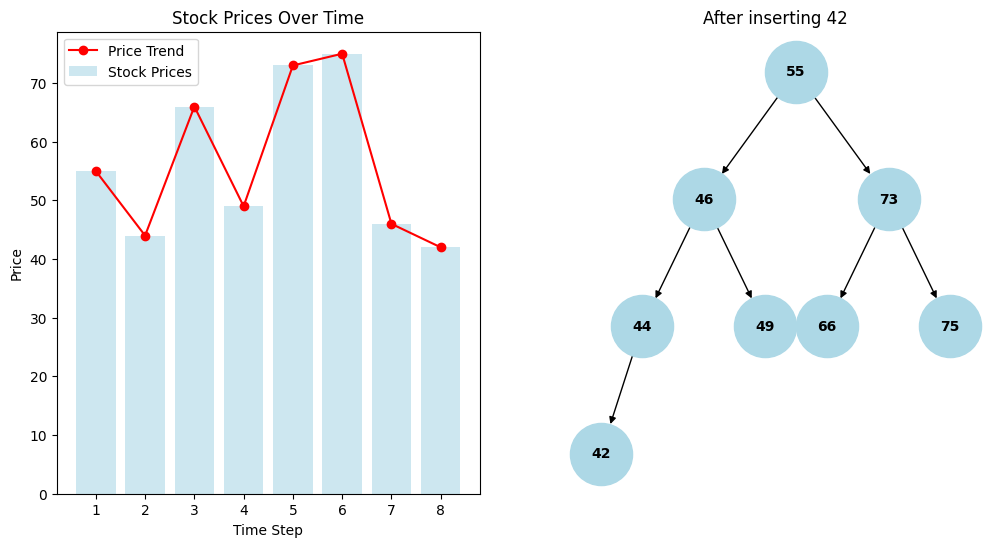

Enter stock price to insert:  40


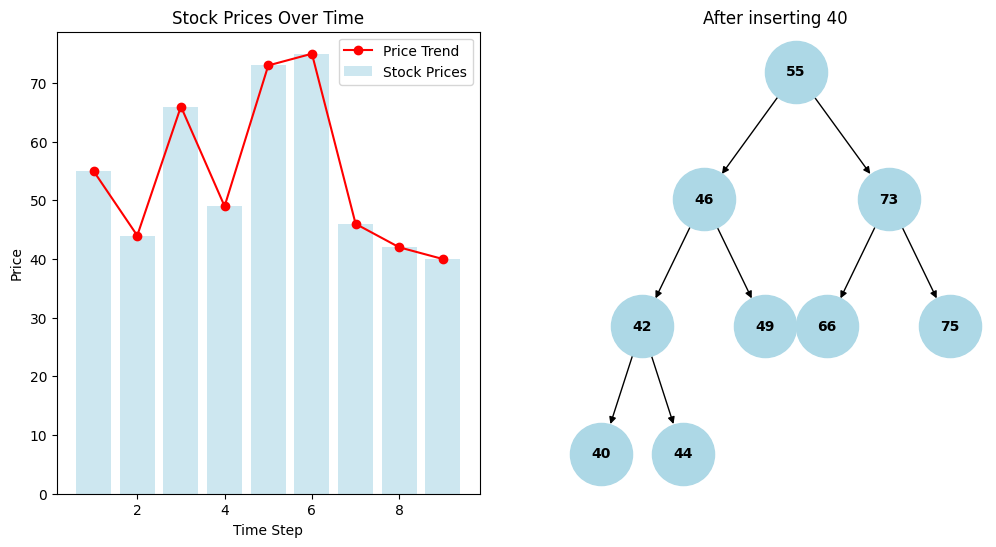

Enter stock price to insert:  -1



Stock Price Management System
1. Insert Stock Price
2. Delete Stock Price
3. Search Stock Price
4. Update Stock Price
5. Display Stock Prices (AVL Tree & Graph)
6. Predict Future Stock Prices
7. Change Confidence Level
8. Exit


Enter your choice:  6
Enter number of days to predict ahead (1-30):  20



Consider using linear predictions for longer forecasts.

===== Stock Price Predictions =====
Using 95.0% confidence level
Day	Linear	Lower	Upper	Poly	Lower	Upper
10	47.78	11.75	83.81	23.93	0.00	48.94
11	46.44	8.32	84.57	20.00	0.00	45.01
12	45.11	4.64	85.58	20.00	0.00	45.01
13	43.78	0.76	86.79	20.00	0.00	45.01
14	42.44	0.00	88.17	20.00	0.00	45.01
15	41.11	0.00	89.69	20.00	0.00	45.01
16	39.78	0.00	91.33	20.00	0.00	45.01
17	38.44	0.00	93.06	20.00	0.00	45.01
18	37.11	0.00	94.88	20.00	0.00	45.01
19	35.78	0.00	96.77	20.00	0.00	45.01
20	34.44	0.00	98.71	20.00	0.00	45.01
21	33.11	0.00	100.71	20.00	0.00	45.01
22	31.78	0.00	102.75	20.00	0.00	45.01
23	30.44	0.00	104.82	20.00	0.00	45.01
24	29.11	0.00	106.93	20.00	0.00	45.01
25	27.78	0.00	109.07	20.00	0.00	45.01
26	26.44	0.00	111.23	20.00	0.00	45.01
27	25.11	0.00	113.42	20.00	0.00	45.01
28	23.78	0.00	115.62	20.00	0.00	45.01
29	22.44	0.00	117.84	20.00	0.00	45.01


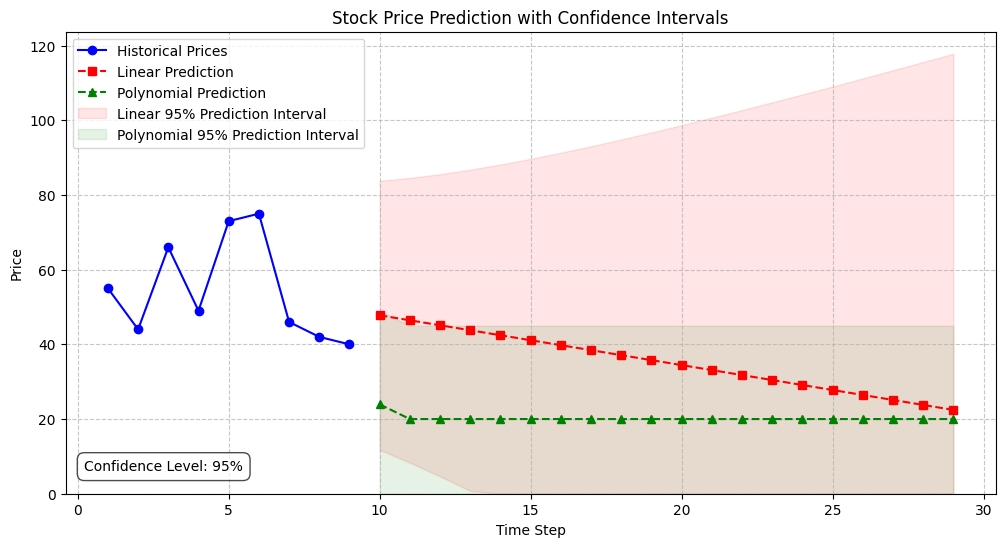


Stock Price Management System
1. Insert Stock Price
2. Delete Stock Price
3. Search Stock Price
4. Update Stock Price
5. Display Stock Prices (AVL Tree & Graph)
6. Predict Future Stock Prices
7. Change Confidence Level
8. Exit


Enter your choice:  4
Enter stock price to update:  40
Enter new stock price:  38


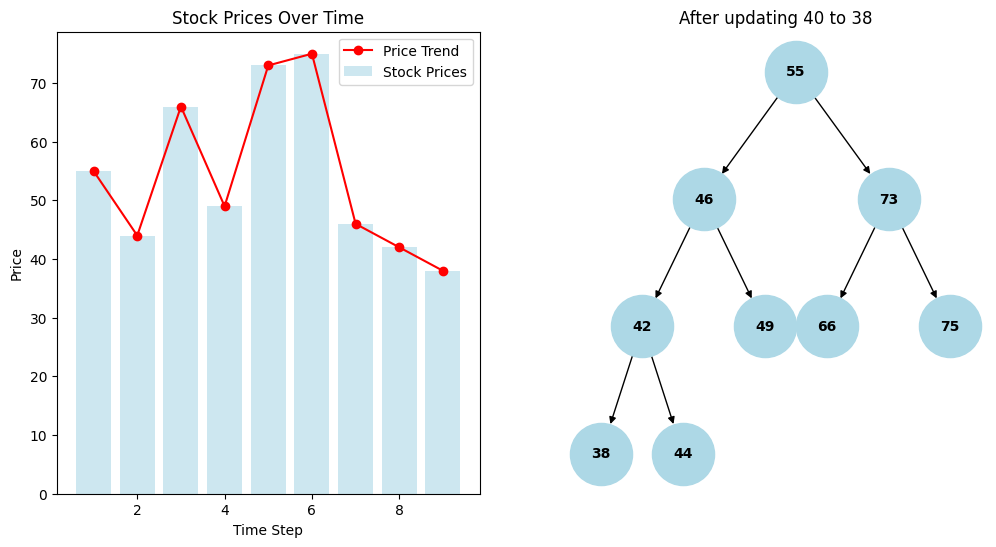


Stock Price Management System
1. Insert Stock Price
2. Delete Stock Price
3. Search Stock Price
4. Update Stock Price
5. Display Stock Prices (AVL Tree & Graph)
6. Predict Future Stock Prices
7. Change Confidence Level
8. Exit


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

# AVL Tree Node Structure
class Node:
    def __init__(self, price):
        self.price = price
        self.left = None
        self.right = None
        self.height = 1

# AVL Tree Class
class AVLTree:
    def get_height(self, node):
        return node.height if node else 0

    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right) if node else 0
    
    def rotate_right(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        x.height = max(self.get_height(x.left), self.get_height(x.right)) + 1

        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left

        y.left = x
        x.right = T2

        x.height = max(self.get_height(x.left), self.get_height(x.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1

        return y

    def insert(self, root, price):
        if not root:
            return Node(price)

        if price < root.price:
            root.left = self.insert(root.left, price)
        elif price > root.price:
            root.right = self.insert(root.right, price)
        else:
            return root  # Duplicates not allowed

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        balance = self.get_balance(root)

        # Rotations
        if balance > 1 and price < root.left.price:
            return self.rotate_right(root)

        if balance < -1 and price > root.right.price:
            return self.rotate_left(root)

        if balance > 1 and price > root.left.price:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        if balance < -1 and price < root.right.price:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def find_min(self, node):
        while node.left:
            node = node.left
        return node

    def delete(self, root, price):
        if not root:
            return root

        if price < root.price:
            root.left = self.delete(root.left, price)
        elif price > root.price:
            root.right = self.delete(root.right, price)
        else:
            if not root.left or not root.right:
                return root.left if root.left else root.right

            temp = self.find_min(root.right)
            root.price = temp.price
            root.right = self.delete(root.right, temp.price)

        if not root:
            return root

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        balance = self.get_balance(root)

        if balance > 1 and self.get_balance(root.left) >= 0:
            return self.rotate_right(root)

        if balance > 1 and self.get_balance(root.left) < 0:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        if balance < -1 and self.get_balance(root.right) <= 0:
            return self.rotate_left(root)

        if balance < -1 and self.get_balance(root.right) > 0:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, price):
        if not root or root.price == price:
            return root
        return self.search(root.left, price) if price < root.price else self.search(root.right, price)

# Stock Price Prediction Class
class StockPredictor:
    def __init__(self, confidence_level=0.95):
        self.linear_model = LinearRegression()
        self.poly_model = LinearRegression()
        self.poly_features = PolynomialFeatures(degree=2)
        self.confidence_level = confidence_level
        self.residual_std = None
        self.mse = None
        self.X = None
        self.y_pred_linear = None
        self.y_pred_poly = None
        self.min_price = 0  # Minimum possible price

    def train_models(self, stock_prices):
        if len(stock_prices) < 3:
            return False
            
        # Set minimum price based on historical data
        self.min_price = min(stock_prices) * 0.5  # Set floor to half of minimum historical price
        
        # Prepare data
        self.X = np.array(range(len(stock_prices))).reshape(-1, 1)
        y = np.array(stock_prices)
        
        # Linear model
        self.linear_model.fit(self.X, y)
        self.y_pred_linear = self.linear_model.predict(self.X)
        
        # Polynomial model
        X_poly = self.poly_features.fit_transform(self.X)
        self.poly_model.fit(X_poly, y)
        self.y_pred_poly = self.poly_model.predict(X_poly)
        
        # Calculate residuals and error metrics
        residuals_linear = y - self.y_pred_linear
        residuals_poly = y - self.y_pred_poly
        
        self.mse_linear = np.mean(residuals_linear**2)
        self.mse_poly = np.mean(residuals_poly**2)
        
        self.residual_std_linear = np.std(residuals_linear)
        self.residual_std_poly = np.std(residuals_poly)
        
        return True

    def predict(self, stock_prices, days_ahead=5):
        if not self.train_models(stock_prices):
            return None, None, None, None
            
        # Degrees of freedom
        n = len(stock_prices)
        p_linear = 2  # intercept and slope
        p_poly = 3    # intercept, linear, and quadratic terms
        
        # Calculate t-values for confidence intervals
        t_critical_linear = stats.t.ppf((1 + self.confidence_level) / 2, n - p_linear)
        t_critical_poly = stats.t.ppf((1 + self.confidence_level) / 2, n - p_poly)
        
        # Generate future time points
        last_day = len(stock_prices)
        future_days = np.array(range(last_day, last_day + days_ahead)).reshape(-1, 1)
        
        # Make predictions
        linear_preds = self.linear_model.predict(future_days)
        poly_preds = self.poly_model.predict(self.poly_features.transform(future_days))
        
        # Apply constraints: prices can't go below zero
        linear_preds = np.maximum(linear_preds, self.min_price)
        poly_preds = np.maximum(poly_preds, self.min_price)
        
        # Calculate prediction intervals
        # For linear model
        MSE_linear = np.mean((stock_prices - self.y_pred_linear)**2)
        x_mean = np.mean(self.X)
        x_std = np.std(self.X)
        
        confidence_linear = []
        for x_future in future_days:
            # Calculate standard error of prediction
            SE_pred_linear = np.sqrt(MSE_linear * (1 + 1/n + (x_future[0] - x_mean)**2 / (n * x_std**2)))
            confidence_linear.append(t_critical_linear * SE_pred_linear)
        
        # For polynomial model (simplified approach)
        MSE_poly = np.mean((stock_prices - self.y_pred_poly)**2)
        confidence_poly = t_critical_poly * np.sqrt(MSE_poly * (1 + 1/n))
        
        return linear_preds, poly_preds, confidence_linear, confidence_poly

    def check_model_reliability(self, stock_prices, days_ahead):
        """Assess if the polynomial model is likely to produce reliable predictions"""
        if len(stock_prices) < 5:
            return False
        
        # Check if the polynomial model is trending sharply
        self.train_models(stock_prices)
        
        # Get the polynomial coefficients
        X_poly = self.poly_features.fit_transform(self.X)
        coeffs = self.poly_model.coef_
        
        # Check if the quadratic term is negative and large
        if len(coeffs) >= 3 and coeffs[2] < 0 and abs(coeffs[2]) > 0.1:
            # Check if the predicted values for the forecast period would go negative
            last_day = len(stock_prices)
            future_days = np.array(range(last_day, last_day + days_ahead)).reshape(-1, 1)
            future_X_poly = self.poly_features.transform(future_days)
            future_pred = self.poly_model.predict(future_X_poly)
            
            if np.any(future_pred < 0):
                return False
        
        return True

# Function to visualize AVL Tree and stock price trends
def draw_visualization(root, stock_prices, title="Stock Price AVL Tree"):
    if not root:
        return

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Ensure stock prices are displayed sequentially
    time_steps = list(range(1, len(stock_prices) + 1))

    # Plot stock prices (bar and line plot)
    axes[0].bar(time_steps, stock_prices, color='lightblue', alpha=0.6, label='Stock Prices')
    axes[0].plot(time_steps, stock_prices, marker='o', linestyle='-', color='red', label='Price Trend')
    axes[0].set_title("Stock Prices Over Time")
    axes[0].set_xlabel("Time Step")
    axes[0].set_ylabel("Price")
    axes[0].legend()

    # Draw AVL tree
    G = nx.DiGraph()
    pos = {}

    def build_graph(node, x=0, y=0, layer=1):
        if node:
            G.add_node(node.price)
            pos[node.price] = (x, -y)

            if node.left:
                G.add_edge(node.price, node.left.price)
                build_graph(node.left, x - 1 / layer, y + 1, layer * 1.5)

            if node.right:
                G.add_edge(node.price, node.right.price)
                build_graph(node.right, x + 1 / layer, y + 1, layer * 1.5)

    build_graph(root)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", ax=axes[1])
    axes[1].set_title(title)

    plt.show(block=False)

# Function to visualize predictions with adaptive confidence intervals
def visualize_predictions(stock_prices, linear_preds, poly_preds, confidence_linear, confidence_poly, confidence_level=0.95):
    historical_days = list(range(1, len(stock_prices) + 1))
    future_days = list(range(len(stock_prices) + 1, len(stock_prices) + len(linear_preds) + 1))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot historical data
    ax.plot(historical_days, stock_prices, marker='o', linestyle='-', color='blue', label='Historical Prices')
    
    # Plot predictions
    ax.plot(future_days, linear_preds, marker='s', linestyle='--', color='red', label='Linear Prediction')
    ax.plot(future_days, poly_preds, marker='^', linestyle='--', color='green', label='Polynomial Prediction')
     
    # Calculate alpha transparency based on confidence level
    # Higher confidence = less transparent (more visible)
    alpha_value = 0.1 + (confidence_level - 0.95) * 0.8
    
    # Plot confidence intervals for linear model
    linear_lower = []
    linear_upper = []
    for i, pred in enumerate(linear_preds):
        linear_lower.append(max(pred - confidence_linear[i], 0))  # Ensure non-negative
        linear_upper.append(pred + confidence_linear[i])
    
    ax.fill_between(future_days, linear_lower, linear_upper, 
                   color='red', alpha=alpha_value, 
                   label=f'Linear {confidence_level*100:.0f}% Prediction Interval')
    
    # Plot confidence intervals for polynomial model
    poly_lower = np.maximum(poly_preds - confidence_poly, 0)  # Ensure non-negative
    poly_upper = poly_preds + confidence_poly
    
    ax.fill_between(future_days, poly_lower, poly_upper, 
                   color='green', alpha=alpha_value, 
                   label=f'Polynomial {confidence_level*100:.0f}% Prediction Interval')
    
    # Add confidence level indicator
    confidence_text = f"Confidence Level: {confidence_level*100:.0f}%"
    ax.text(0.02, 0.05, confidence_text, transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))
    
    # Set y-axis to start from 0
    ax.set_ylim(bottom=0)
    
    ax.set_title("Stock Price Prediction with Confidence Intervals")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.show(block=False)

# Main Function
if __name__ == "__main__":
    avl = AVLTree()
    predictor = StockPredictor(confidence_level=0.95)  # 95% confidence
    root = None
    stock_prices = []

    while True:
        print("\nStock Price Management System")
        print("1. Insert Stock Price")
        print("2. Delete Stock Price")
        print("3. Search Stock Price")
        print("4. Update Stock Price")
        print("5. Display Stock Prices (AVL Tree & Graph)")
        print("6. Predict Future Stock Prices")
        print("7. Change Confidence Level")
        print("8. Exit")

        try:
            choice = int(input("Enter your choice: "))

            if choice == 1:
                while True:
                    price = int(input("Enter stock price to insert: "))
                    if price==-1:
                        break
                    if price <= 0:
                        print("Error: Stock price must be positive.")
                        continue
                    root = avl.insert(root, price)
                    stock_prices.append(price)
                    draw_visualization(root, stock_prices, title=f"After inserting {price}")

            elif choice == 2:
                price = int(input("Enter stock price to delete: "))
                root = avl.delete(root, price)
                if price in stock_prices:
                    stock_prices.remove(price)
                draw_visualization(root, stock_prices, title=f"After deleting {price}")

            elif choice == 3:
                price = int(input("Enter stock price to search: "))
                result = avl.search(root, price)
                if result:
                    print(f"Stock price {price} found in AVL Tree.")
                else:
                    print(f"Stock price {price} NOT found in AVL Tree.")

            elif choice == 4:
                old_price = int(input("Enter stock price to update: "))
                new_price = int(input("Enter new stock price: "))
                if new_price <= 0:
                    print("Error: Stock price must be positive.")
                    continue
                root = avl.delete(root, old_price)
                root = avl.insert(root, new_price)
                if old_price in stock_prices:
                    stock_prices.remove(old_price)
                stock_prices.append(new_price)
                draw_visualization(root, stock_prices, title=f"After updating {old_price} to {new_price}")

            elif choice == 5:
                draw_visualization(root, stock_prices, title="Stock Price AVL Tree Visualization")
                
            elif choice == 6:
                if len(stock_prices) < 3:
                    print("Need at least 3 data points for prediction.")
                    continue
                    
                days = int(input("Enter number of days to predict ahead (1-30): "))
                if days < 1 or days > 30:
                    print("Please enter a valid number between 1 and 30.")
                    continue
                
                # Check if polynomial model is reliable for this forecast period
                poly_reliable = predictor.check_model_reliability(stock_prices, days)
                if not poly_reliable:
                    print("\nWarning: Polynomial model may not be reliable for this forecast period.")
                    print("Consider using linear predictions for longer forecasts.")
                    
                linear_preds, poly_preds, confidence_linear, confidence_poly = predictor.predict(stock_prices, days)
                
                print("\n===== Stock Price Predictions =====")
                print(f"Using {predictor.confidence_level*100}% confidence level")
                print("Day\tLinear\tLower\tUpper\tPoly\tLower\tUpper")
                
                for i in range(days):
                    day = len(stock_prices) + i + 1
                    lin_pred = linear_preds[i]
                    lin_lower = max(lin_pred - confidence_linear[i], 0)  # Ensure non-negative
                    lin_upper = lin_pred + confidence_linear[i]
                    
                    poly_pred = poly_preds[i]
                    poly_lower = max(poly_pred - confidence_poly, 0)  # Ensure non-negative
                    poly_upper = poly_pred + confidence_poly
                    
                    print(f"{day}\t{lin_pred:.2f}\t{lin_lower:.2f}\t{lin_upper:.2f}\t{poly_pred:.2f}\t{poly_lower:.2f}\t{poly_upper:.2f}")
                
                if poly_reliable:
                    print("\nNote: The polynomial model may be more accurate for short-term predictions,")
                    print("while the linear model might work better for long-term trends.")
                
                # Pass the confidence level to the visualization function
                visualize_predictions(stock_prices, linear_preds, poly_preds, confidence_linear, confidence_poly, predictor.confidence_level)
                
            elif choice == 7:
                conf_level = float(input("Enter confidence level (0.95 to 0.99): "))
                if 0.95 <= conf_level <= 0.99:
                    predictor = StockPredictor(confidence_level=conf_level)
                    print(f"Confidence level set to {conf_level*100}%")
                else:
                    print("Please enter a value between 0.95 and 0.99")

            elif choice == 8:
                print("Exiting...")
                break

            else:
                print("Invalid choice! Please enter a number between 1-8.")

        except ValueError:
            print("Invalid input! Please enter a valid number.")